In [186]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [73]:
def show_img(img, gray=True, splt=111, title="Image",axis="off"):
    plt.subplot(splt)
    plt.axis(axis)
    plt.title(title)
    if gray:
        plt.imshow(img, "gray",vmin=np.amin(img),vmax=np.amax(img))
    else:
        plt.imshow(img)

In [16]:
def show_hist(img):
    plt.hist(img.ravel(), 256, (0,256))

In [161]:
def get_mask(n,r):
#     n = 3
    a, b = n//2, n//2
#     r = 1

    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x*x + y*y <= r*r
    return mask.astype(np.uint8)
#     array = np.ones((n, n))
#     array[mask] = 255

In [ ]:
def dilation(img,kernel):
    

In [46]:
img = cv2.imread('eye.png',0)

(106, 114)


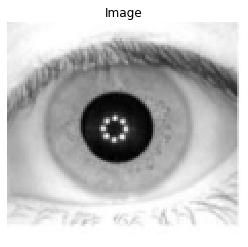

In [47]:
show_img(img,gray=True)
print(img.shape)

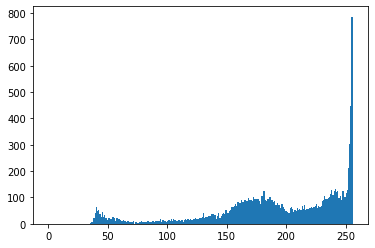

In [48]:
show_hist(img)

In [61]:
eye = img.copy().astype(np.float)
eye /= 255
t= 0.5
eye[eye<t] = 0
eye[eye>=t] = 1
eye = eye.astype(np.bool)

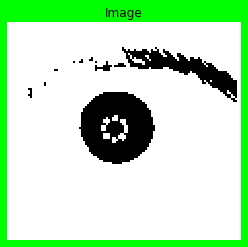

In [74]:
plt.figure(facecolor=(0,1,0))
show_img(eye)

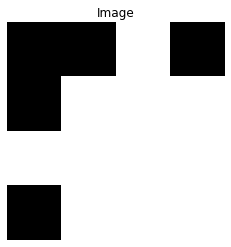

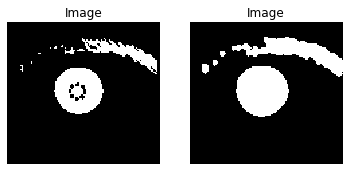

In [166]:
cmp = np.invert(eye).astype(np.uint8)
cmp.dtype
kern = get_mask(4,2)
show_img(kern)

plt.figure()
show_img(cmp,splt=121)
show_img(cv2.dilate(cmp,kern,iterations=1),splt=122)

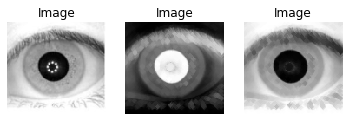

In [173]:
kernel =get_mask(3,1).astype(np.uint8)
# bdl = cv2.
dltd = cv2.dilate(np.invert(img), kernel, iterations=2) 
show_img(img,splt=131)
show_img(dltd,splt=132)
show_img(np.invert(dltd),splt=133)
# show_img(np.invert(img))

In [71]:
show_img(cmpmnt)

IndexError: index 1424 is out of bounds for axis 0 with size 106

In [117]:
n = 3
a, b = n//2, n//2
r = 1

y,x = np.ogrid[-a:n-a, -b:n-b]
mask = x*x + y*y <= r*r

array = np.ones((n, n))
array[mask] = 255

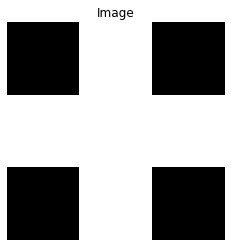

In [118]:
show_img(mask)
# array

0.49 54 47 38


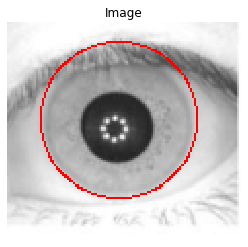

In [185]:
from PIL import Image, ImageDraw
from math import sqrt, pi, cos, sin
from canny import canny_edge_detector
from collections import defaultdict

# Load image:
input_image = Image.open("eye.png")

# Output image:
output_image = Image.new("RGB", input_image.size)
output_image.paste(input_image)
draw_result = ImageDraw.Draw(output_image)

# Find circles
rmin = 35
rmax = 40
steps = 100
threshold = 0.4

points = []
for r in range(rmin, rmax + 1):
    for t in range(steps):
        points.append((r, int(r * cos(2 * pi * t / steps)), int(r * sin(2 * pi * t / steps))))
# print(points)
acc = defaultdict(int)
for x, y in canny_edge_detector(input_image):
    for r, dx, dy in points:
        a = x - dx
        b = y - dy
        acc[(a, b, r)] += 1

circles = []
for k, v in sorted(acc.items(), key=lambda i: -i[1]):
    x, y, r = k
    if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
        print(v / steps, x, y, r)
        circles.append((x, y, r))

for x, y, r in circles:
    draw_result.ellipse((x-r, y-r, x+r, y+r), outline=(255,0,0,0))

show_img(output_image)    

# Save output image
output_image.save("result.png")